In [167]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [168]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv('train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [171]:
df.shape


(800, 22)

In [172]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [173]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [174]:
df['ethnicity'].value_counts()


ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [175]:
df['relation'].value_counts()


relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [176]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


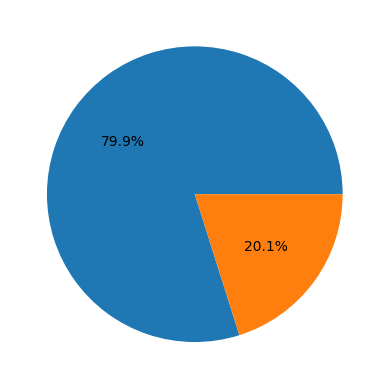

In [177]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [178]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


In [179]:
ints.remove('ID')
ints.remove('Class/ASD')


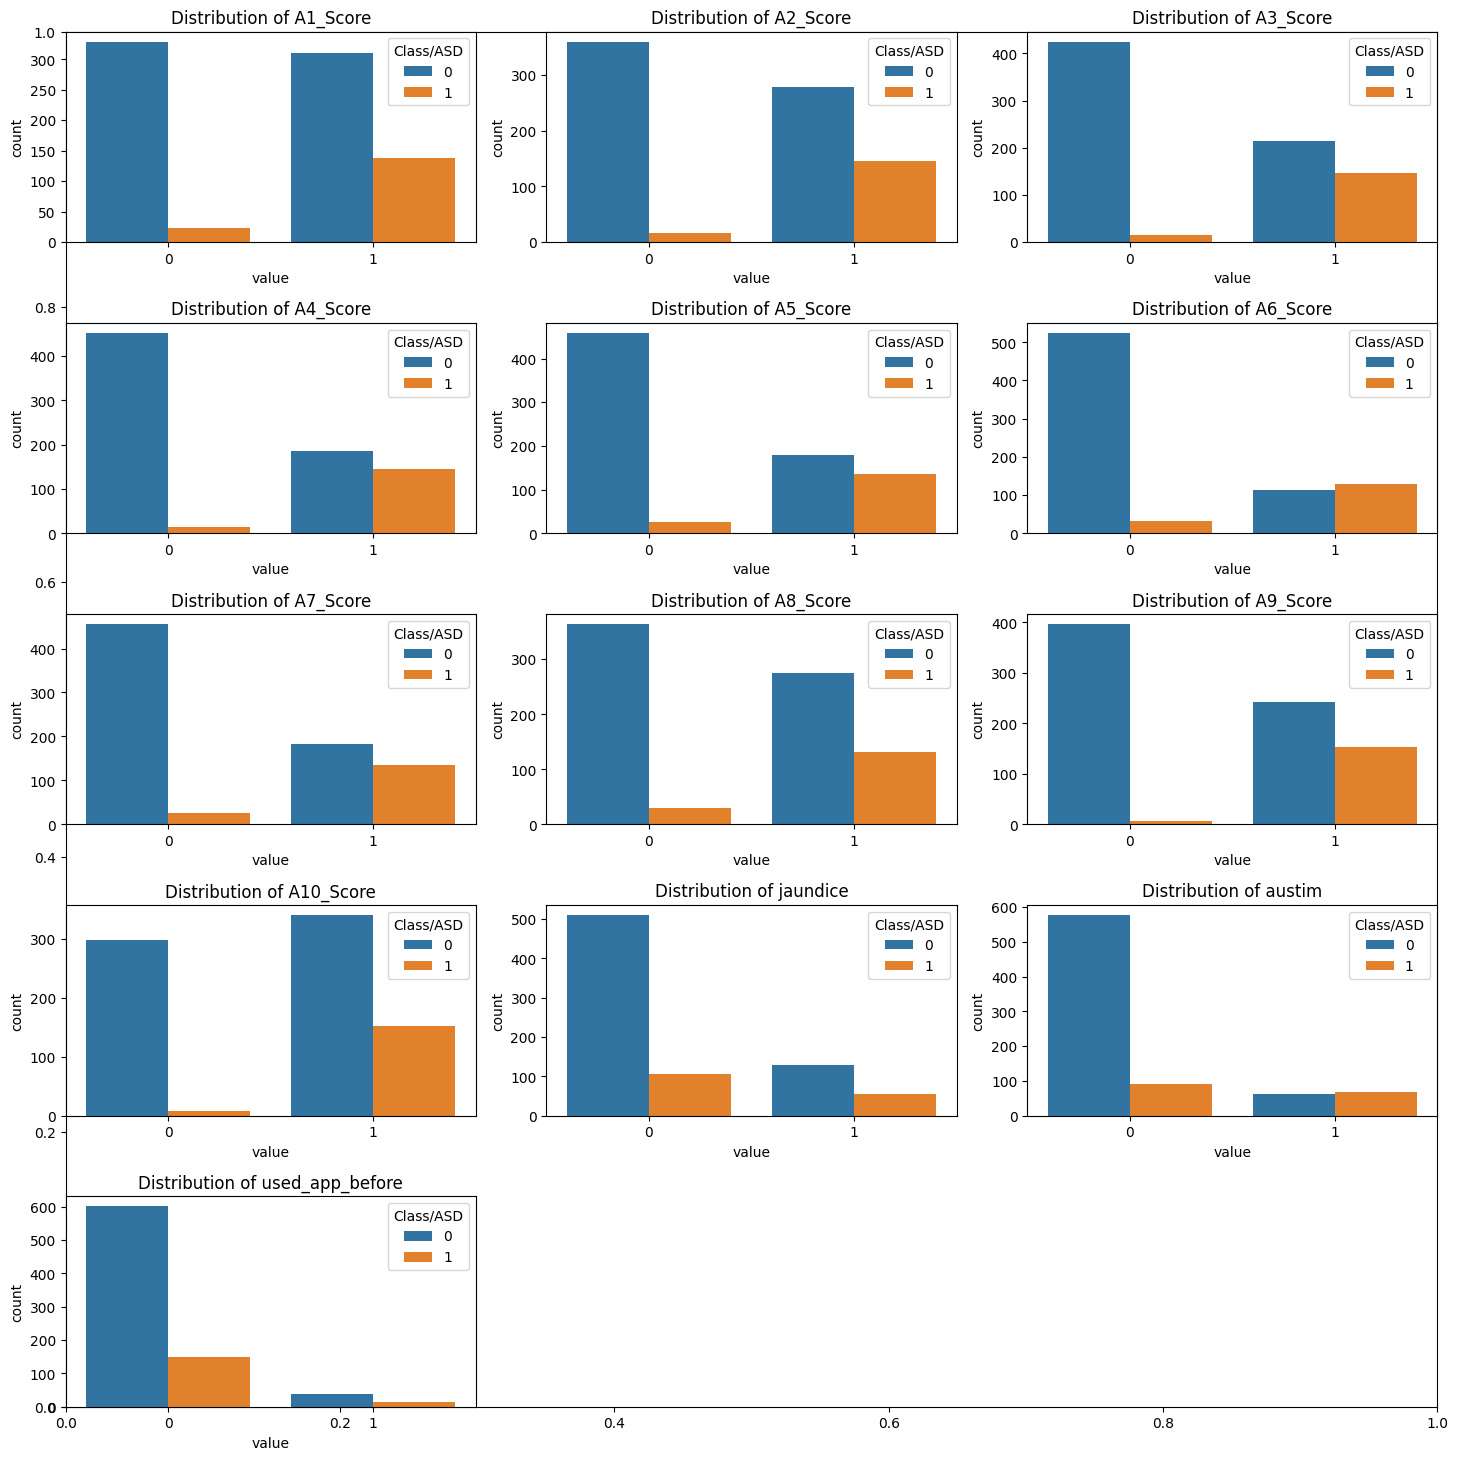

In [180]:

df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  
  sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col])
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


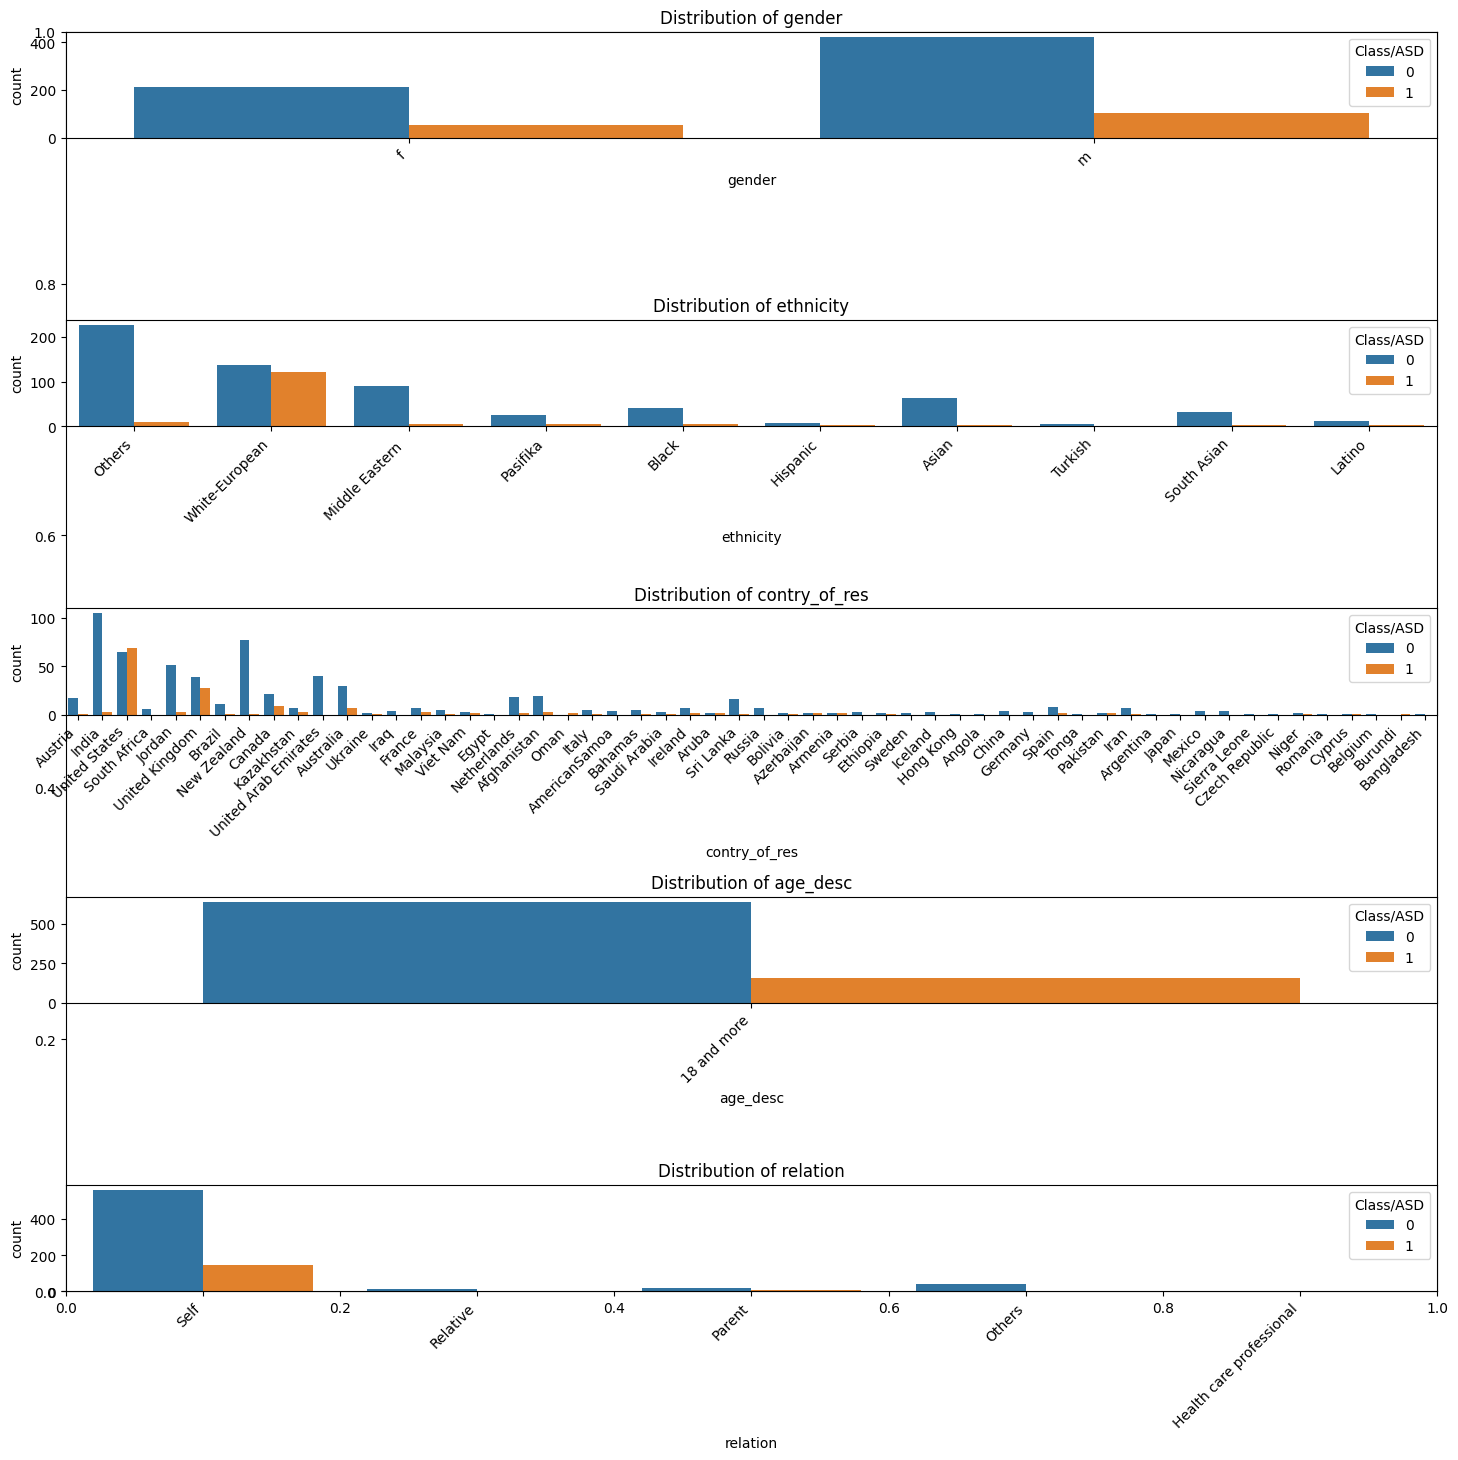

In [181]:

plt.subplots(figsize=(15, 15))  

for i, col in enumerate(objects):
    plt.subplot(5, 1, i + 1)  
    sb.countplot(x=col, hue='Class/ASD', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()


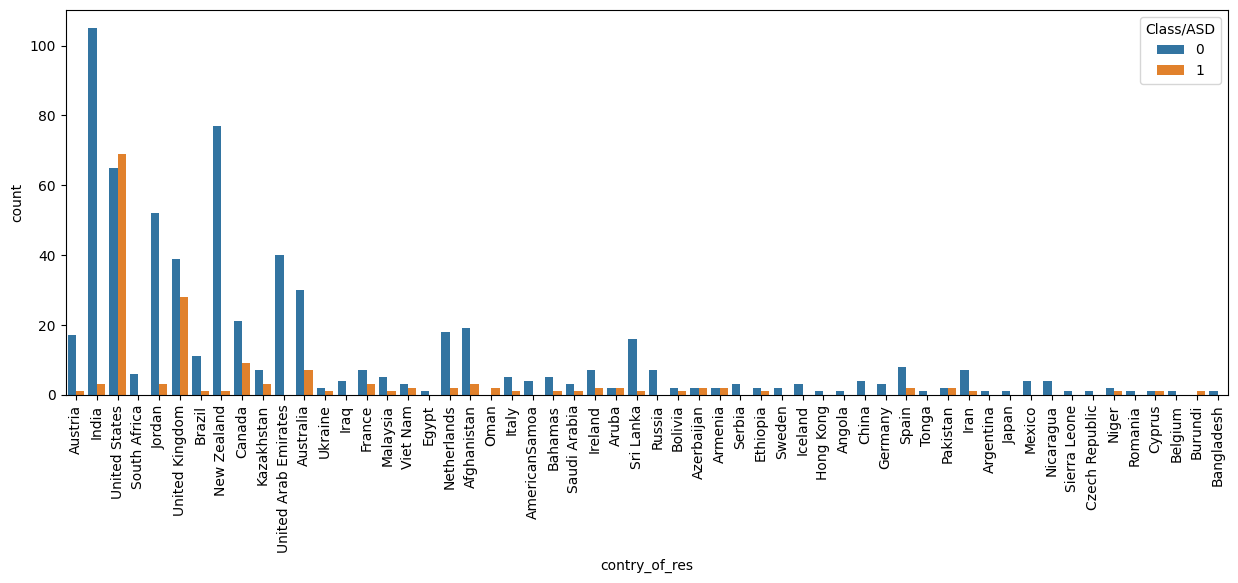

In [182]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


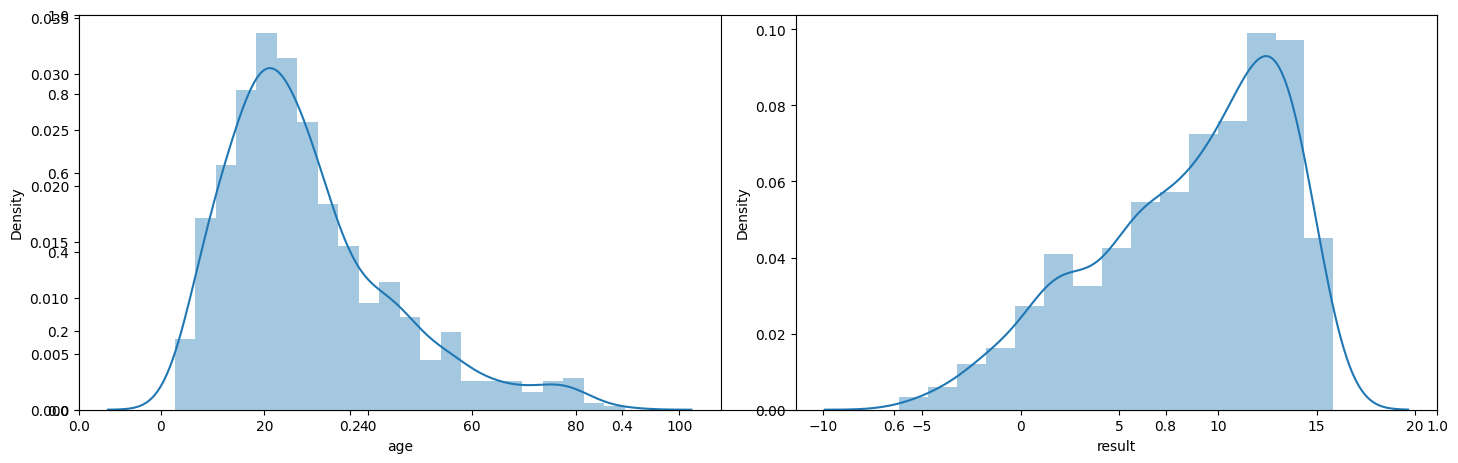

In [183]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


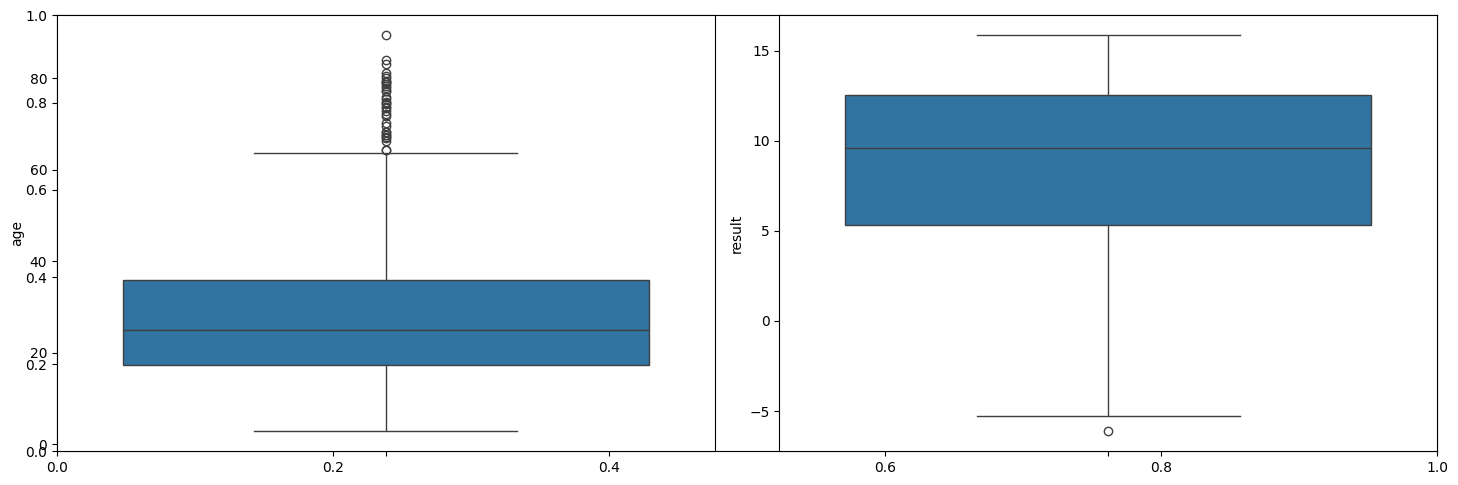

In [184]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [185]:
df = df[df['result']>-5]
df.shape


(798, 22)

In [186]:


def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


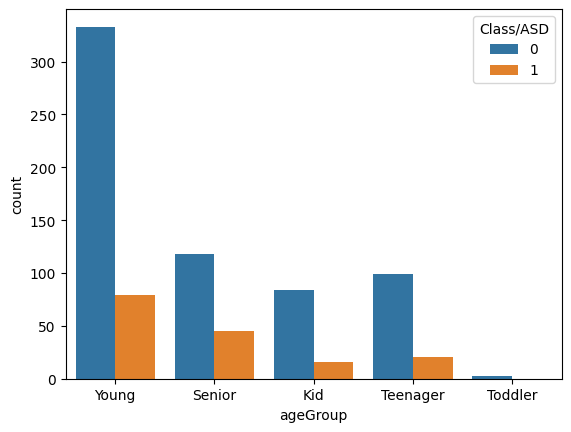

In [187]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [188]:
def add_feature(data):

  
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    
    
    data['sum_score'] += data[col]

  
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


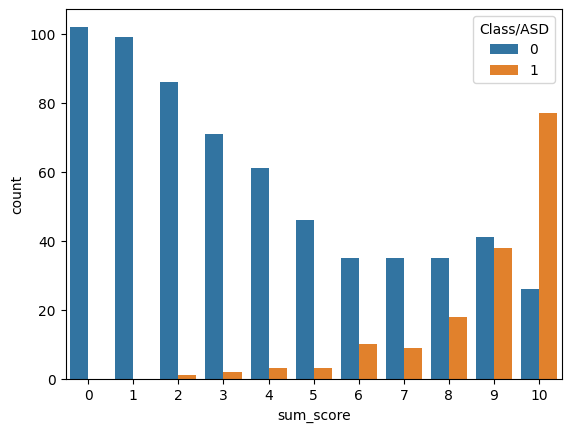

In [189]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [190]:

df['age'] = df['age'].apply(lambda x: np.log(x))


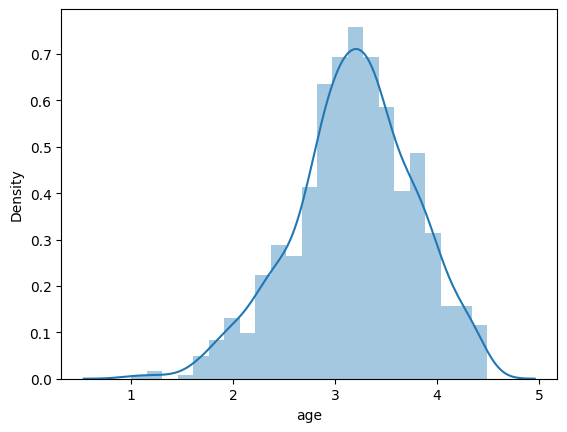

In [191]:
sb.distplot(df['age'])
plt.show()


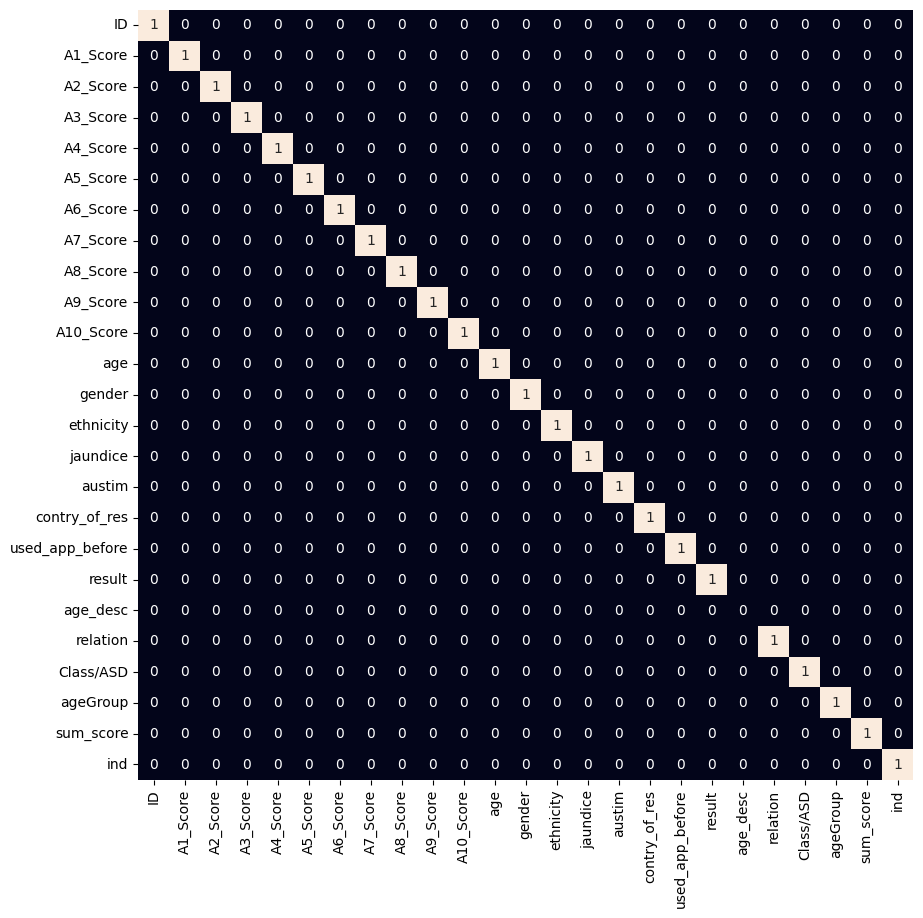

In [192]:
def encode_labels(data):
    for col in data.columns:

      
      
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)


plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [193]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [194]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)


ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((1026, 20), (1026,))

In [ ]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.8664717348927876
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7491039426523298

SVC() : 
Training Accuracy :  0.9405458089668616
Validation Ac

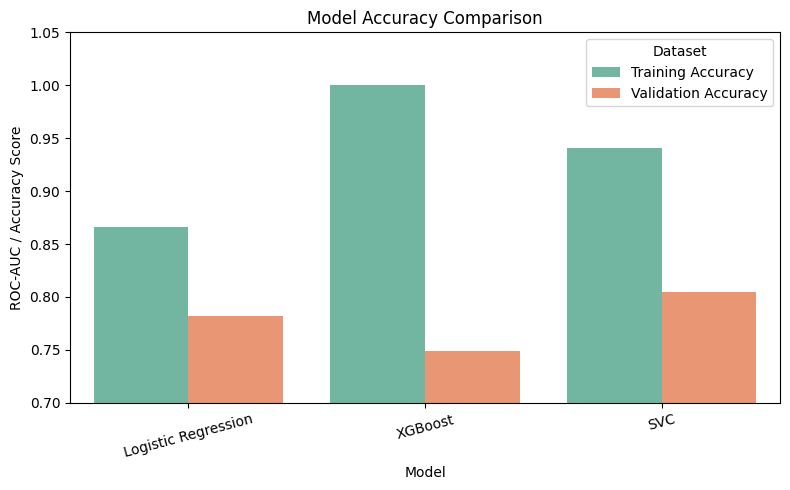

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Accuracy data from your results
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'SVC'],
    'Training Accuracy': [0.8665, 1.0, 0.9405],
    'Validation Accuracy': [0.7823, 0.7491, 0.8042]
}

df = pd.DataFrame(data)

# Melt the data for grouped barplot
df_melted = df.melt(id_vars='Model', var_name='Set', value_name='Accuracy')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', hue='Set', data=df_melted, palette='Set2')

plt.ylim(0.7, 1.05)
plt.title('Model Accuracy Comparison')
plt.ylabel('ROC-AUC / Accuracy Score')
plt.xticks(rotation=15)
plt.legend(title='Dataset')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='roc_auc')
grid.fit(X, Y)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [200]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.8664717348927876
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7491039426523298

SVC() : 
Training Accuracy :  0.9405458089668616
Validation Ac

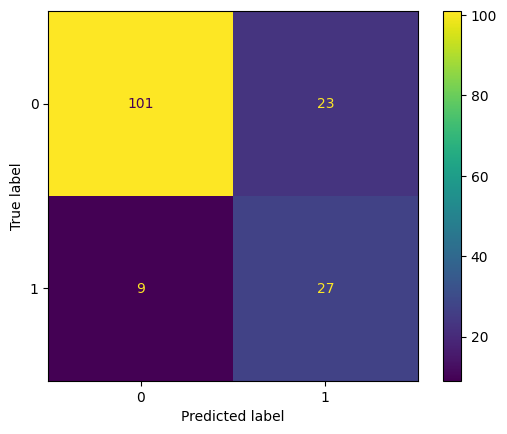

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()

In [ ]:

import pandas as pd
import joblib
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from imblearn.over_sampling import RandomOverSampler 


os.makedirs('model', exist_ok=True)


try:
    
    df = pd.read_csv('train.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the dataset is in the same directory as your notebook.")
    raise 


df_processed = df.copy()



for col in df_processed.select_dtypes(include=['object']).columns:
    df_processed[col] = df_processed[col].astype(str).str.strip()



df_processed['ethnicity'] = df_processed['ethnicity'].replace({'?': 'Others', 'others': 'Others', 'Other': 'Others'})



df_processed['relation'] = df_processed['relation'].replace({'?': 'Others', 'others': 'Others'})




df_processed['gender'] = df_processed['gender'].map({'m': 0, 'f': 1})
df_processed['jaundice'] = df_processed['jaundice'].map({'no': 0, 'yes': 1})
df_processed['austim'] = df_processed['austim'].map({'no': 0, 'yes': 1})
df_processed['used_app_before'] = df_processed['used_app_before'].map({'no': 0, 'yes': 1})


df_processed['age_desc'] = df_processed['age'].apply(lambda x: '18 and more' if x >= 18 else '17 and less')

df_processed['age_desc'] = df_processed['age_desc'].map({'18 and more': 0, '17 and less': 1})




all_ethnicities_training = sorted(df_processed['ethnicity'].unique().tolist())
all_relations_training = sorted(df_processed['relation'].unique().tolist())
print(f"Unique ethnicities after cleaning: {all_ethnicities_training}")
print(f"Unique relations after cleaning: {all_relations_training}")



ethnicity_dummies = pd.get_dummies(df_processed['ethnicity'], prefix='ethnicity')
relation_dummies = pd.get_dummies(df_processed['relation'], prefix='relation')



ethnicity_dummies = ethnicity_dummies.reindex(columns=[f'ethnicity_{e}' for e in all_ethnicities_training], fill_value=0)
relation_dummies = relation_dummies.reindex(columns=[f'relation_{r}' for r in all_relations_training], fill_value=0)





df_processed = pd.concat([df_processed, ethnicity_dummies, relation_dummies], axis=1)
df_processed = df_processed.drop(columns=['ethnicity', 'relation', 'contry_of_res', 'ID', 'result'], errors='ignore')




X = df_processed.drop(['Class/ASD', 'age_desc'], axis=1, errors='ignore')
Y = df_processed['Class/ASD']

print(f"Shape of X before oversampling: {X.shape}")
print(f"Value counts of Y before oversampling:\n{Y.value_counts()}")



oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)
print(f"Shape of X after oversampling: {X_resampled.shape}")
print(f"Value counts of Y after oversampling:\n{Y_resampled.value_counts()}")


numerical_features = [f'A{i}_Score' for i in range(1, 11)] + ['age']


scaler = StandardScaler()
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])



best_model = SVC(kernel='rbf', probability=True, random_state=42) 
best_model.fit(X_resampled, Y_resampled) 


joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(best_model, 'model/autism_predictor_model.pkl')


joblib.dump(X_resampled.columns.tolist(), 'model/feature_names.pkl')
print("Scaler, model, and feature names saved successfully.")


Dataset loaded successfully.
Unique ethnicities after cleaning: ['Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern', 'Others', 'Pasifika', 'South Asian', 'Turkish', 'White-European']
Unique relations after cleaning: ['Health care professional', 'Others', 'Parent', 'Relative', 'Self']
Shape of X before oversampling: (800, 30)
Value counts of Y before oversampling:
Class/ASD
0    639
1    161
Name: count, dtype: int64
Shape of X after oversampling: (1278, 30)
Value counts of Y after oversampling:
Class/ASD
0    639
1    639
Name: count, dtype: int64
Scaler, model, and feature names saved successfully.


In [ ]:

import pandas as pd
import joblib
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from imblearn.over_sampling import RandomOverSampler 

os.makedirs('model', exist_ok=True)

try:

    df = pd.read_csv('train.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please ensure the dataset is in the same directory as your notebook.")
    raise 

df_processed = df.copy()


for col in df_processed.select_dtypes(include=['object']).columns:
    df_processed[col] = df_processed[col].astype(str).str.strip()


df_processed['ethnicity'] = df_processed['ethnicity'].replace({'?': 'Others', 'others': 'Others', 'Other': 'Others'})



df_processed['relation'] = df_processed['relation'].replace({'?': 'Others', 'others': 'Others'})


df_processed['gender'] = df_processed['gender'].map({'m': 0, 'f': 1})
df_processed['jaundice'] = df_processed['jaundice'].map({'no': 0, 'yes': 1})
df_processed['austim'] = df_processed['austim'].map({'no': 0, 'yes': 1})
df_processed['used_app_before'] = df_processed['used_app_before'].map({'no': 0, 'yes': 1})

df_processed['age_desc'] = df_processed['age'].apply(lambda x: '18 and more' if x >= 18 else '17 and less')

df_processed['age_desc'] = df_processed['age_desc'].map({'18 and more': 0, '17 and less': 1})



all_ethnicities_training = sorted(df_processed['ethnicity'].unique().tolist())
all_relations_training = sorted(df_processed['relation'].unique().tolist())
print(f"Unique ethnicities after cleaning: {all_ethnicities_training}")
print(f"Unique relations after cleaning: {all_relations_training}")

ethnicity_dummies = pd.get_dummies(df_processed['ethnicity'], prefix='ethnicity')
relation_dummies = pd.get_dummies(df_processed['relation'], prefix='relation')


ethnicity_dummies = ethnicity_dummies.reindex(columns=[f'ethnicity_{e}' for e in all_ethnicities_training], fill_value=0)
relation_dummies = relation_dummies.reindex(columns=[f'relation_{r}' for r in all_relations_training], fill_value=0)



df_processed = pd.concat([df_processed, ethnicity_dummies, relation_dummies], axis=1)
df_processed = df_processed.drop(columns=['ethnicity', 'relation', 'contry_of_res', 'ID', 'result'], errors='ignore')



X = df_processed.drop(['Class/ASD', 'age_desc'], axis=1, errors='ignore')
Y = df_processed['Class/ASD']

print(f"Shape of X before oversampling: {X.shape}")
print(f"Value counts of Y before oversampling:\n{Y.value_counts()}")


oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)
print(f"Shape of X after oversampling: {X_resampled.shape}")
print(f"Value counts of Y after oversampling:\n{Y_resampled.value_counts()}")

numerical_features = [f'A{i}_Score' for i in range(1, 11)] + ['age']

scaler = StandardScaler()
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])

best_model = SVC(kernel='rbf', probability=True, random_state=42) 
best_model.fit(X_resampled, Y_resampled) 
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(best_model, 'model/autism_predictor_model.pkl')
joblib.dump(X_resampled.columns.tolist(), 'model/feature_names.pkl')
print("Scaler, model, and feature names saved successfully.")


Dataset loaded successfully.
Unique ethnicities after cleaning: ['Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern', 'Others', 'Pasifika', 'South Asian', 'Turkish', 'White-European']
Unique relations after cleaning: ['Health care professional', 'Others', 'Parent', 'Relative', 'Self']
Shape of X before oversampling: (800, 30)
Value counts of Y before oversampling:
Class/ASD
0    639
1    161
Name: count, dtype: int64
Shape of X after oversampling: (1278, 30)
Value counts of Y after oversampling:
Class/ASD
0    639
1    639
Name: count, dtype: int64
Scaler, model, and feature names saved successfully.


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

print(Y_resampled.value_counts())


Class/ASD
0    639
1    639
Name: count, dtype: int64


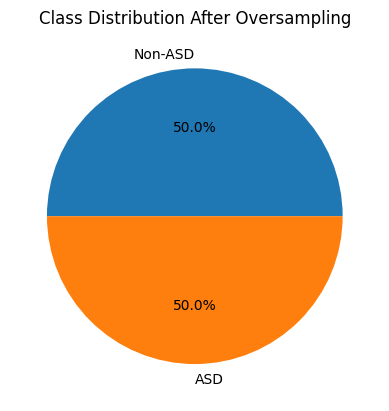

In [ ]:
plt.pie(Y_resampled.value_counts(), labels=['Non-ASD', 'ASD'], autopct='%1.1f%%')
plt.title("Class Distribution After Oversampling")
plt.show()


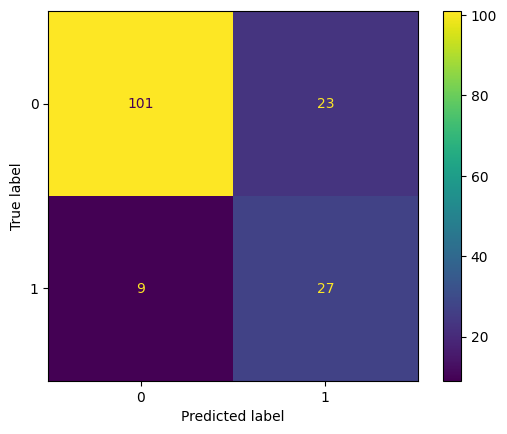

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()
